In [3]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
Data1 = pd.read_csv('data1.csv')
Data1

,U,I
0,0.5,574.6
1,1.0,270.0
2,1.5,386.0
3,2.0,919.3
4,2.5,1982.7
5,3.0,3375.3
6,3.5,4593.1
7,4.0,4787.1
8,4.5,3833.1
9,5.0,2405.3


a =  -5435.258082188962
b =  -355.50596953110886
c =  -2.232723009187075
d =  3.8270492561704206
sigma_a =  166.77302272420397
sigma_b =  101.74377157135298
sigma_c =  0.13730365581592444
sigma_d =  0.03226804558585995
S_e =  184.59670872326888
Relative S_r a = %  3.0683551765593227
Relative S_r b = %  28.619427039592875
Relative S_r c = %  6.149605448188404
Relative S_r d = %  0.8431573106573844


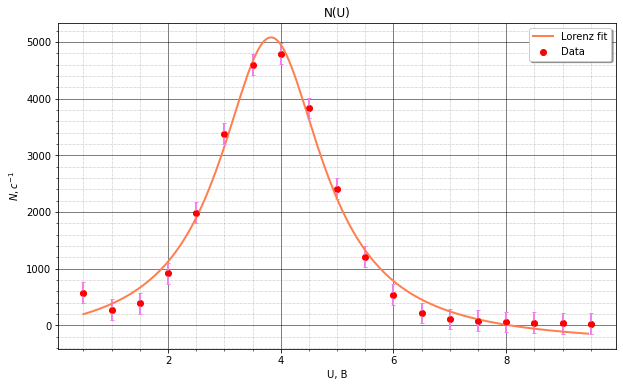

In [5]:
X = np.array(Data1['U'])
Y = np.array(Data1['I'])

def approx(x, a, b,c,d):
    return b - a/(1 + (2*(x - d)/c)**2)
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)
#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)

residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))
# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(0.5,9.5, 0.05)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(X, Y, c = 'r')
lgnd = ax.legend(['Lorenz fit', 'Data'], loc='best', shadow=True)

ax.set_title(r'N(U)')
ax.set_ylabel(r'$N, c^{-1}$')
ax.set_xlabel(r'U, B')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(X, Y, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')


plt.savefig('pictures/N(V).png', dpi=400, quality=100)
plt.show()

In [6]:
data2 = pd.read_csv('data2.csv')
data2

,N1,v1,N2,v2,N3,v3,N4,v4
0,40245.0,-1.76,20027.0,-1.76,8632.0,-1.76,25258.5,-0.78
1,38288.0,2.15,18182.0,1.79,7485.0,1.79,25726.9,0.79
2,40272.0,-1.53,20020.0,-2.17,8672.0,-1.57,27310.6,-1.08
3,39090.0,1.56,16748.0,2.19,7891.0,1.61,27585.5,1.09
4,40250.0,-2.00,20093.0,-1.51,8665.0,-2.01,28697.6,-1.39
5,37042.0,2.02,18932.0,1.56,7010.0,2.03,28928.6,1.39
6,40207.0,-2.43,20014.0,-1.99,8687.0,-2.41,29348.6,-1.54
7,36854.0,2.43,17193.0,2.03,6928.0,2.42,29447.4,1.54
8,40214.0,-2.81,20111.0,-2.43,8636.0,-2.83,29371.0,-1.55
9,38248.0,2.82,17065.0,2.45,7513.0,3.23,29527.0,1.59


In [7]:
N_inf1, N_inf2, N_inf3, N_inf4 = 40419,20120,8728,32138
N_f = 14
X1 = (np.array(data2.v1[pd.isna(data2.v1) == False]))
Y1 = np.array(data2.N1[pd.isna(data2.N1) == False])
X2 = np.array(data2.v2[pd.isna(data2.v2) == False])
Y2 = np.array(data2.N2[pd.isna(data2.N2) == False])
X3 = np.array(data2.v3[pd.isna(data2.v3) == False])
Y3 = np.array(data2.N3[pd.isna(data2.N3) == False])
X4 = np.array(data2.v4[pd.isna(data2.v4) == False])
Y4 = np.array(data2.N4[pd.isna(data2.N4) == False])

a =  -3138.1419234513232
b =  40332.52078286314
c =  -1.4620781687901392
d =  2.3663822988475727
sigma_a =  236.85430413875696
sigma_b =  101.55084835242246
sigma_c =  0.21919765065884836
sigma_d =  0.05907394067578598
S_e =  274.93037040381773
Relative S_r a = %  7.547596951200505
Relative S_r b = %  0.25178403526806176
Relative S_r c = %  14.992197772861426
Relative S_r d = %  2.4963819541988195


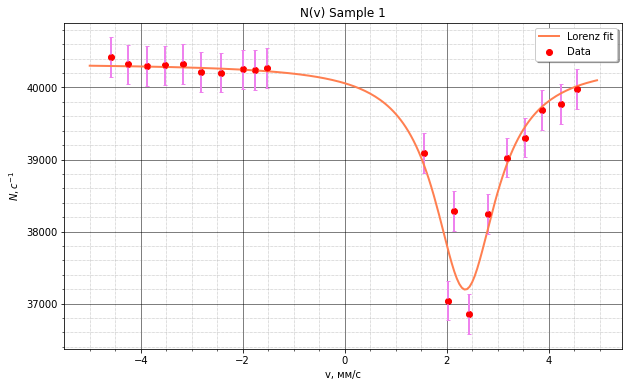

In [8]:
X = X1
Y = Y1

def approx(x, a, b,c,d):
    return b - abs(a)/(1 + (2*(x - d)/c)**2)
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)
#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)

residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))
# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(-5,5, 0.05)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(X, Y, c = 'r')
lgnd = ax.legend(['Lorenz fit', 'Data'], loc='best', shadow=True)

ax.set_title(r'N(v) Sample 1')
ax.set_ylabel(r'$N, c^{-1}$')
ax.set_xlabel(r'v, мм/с')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(X, Y, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.savefig('pictures/S1fit.png', dpi=400, quality=100)
plt.show()

In [20]:
dots[list(approx(dots, *beta_opt1)).index(min(approx(dots, *beta_opt1)))]

2.349999999999974

a =  -3304.3371374705703
b =  20085.86436030551
c =  0.32553050522405064
sigma_a =  97.19098944871239
sigma_b =  39.2630101628241
sigma_c =  0.017926808288153375
sigma_d =  0.019659611287683256
S_e =  116.38287766740471
Relative S_r a = %  2.9413157739440265
Relative S_r b = %  0.1954758304572505
Relative S_r c = %  5.506951883300465
Relative S_r d = %  0.8482143557133425


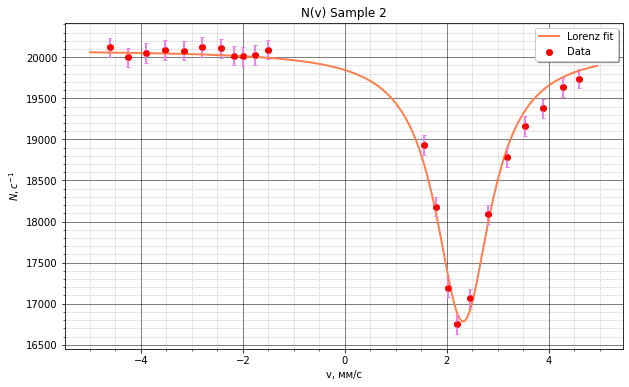

In [142]:
X = X2
Y = Y2

def approx(x, a,b,c,d):
    return b - abs(a)/(1 + (0.5*(x - d)/c)**2)
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]

print('a = ', a)
print('b = ', b)
print('c = ', c)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)

residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(-5,5, 0.05)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(X, Y, c = 'r')
lgnd = ax.legend(['Lorenz fit', 'Data'], loc='best', shadow=True)

ax.set_title(r'N(v) Sample 2')
ax.set_ylabel(r'$N, c^{-1}$')
ax.set_xlabel(r'v, мм/с')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(X, Y, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.savefig('pictures/S2fit.png', dpi=400, quality=100)
plt.show()

a =  -1873.4463922020832
b =  8715.935363389675
c =  1.672355727558537
d =  2.4087434646074
sigma_a =  91.79219454494712
sigma_b =  33.761811134529765
sigma_c =  0.12702389052836613
sigma_d =  0.03518511849557574
S_e =  88.93919234836666
Relative S_r a = %  4.899643508723668
Relative S_r b = %  0.387357291293629
Relative S_r c = %  7.595506651793971
Relative S_r d = %  5.273450344330034


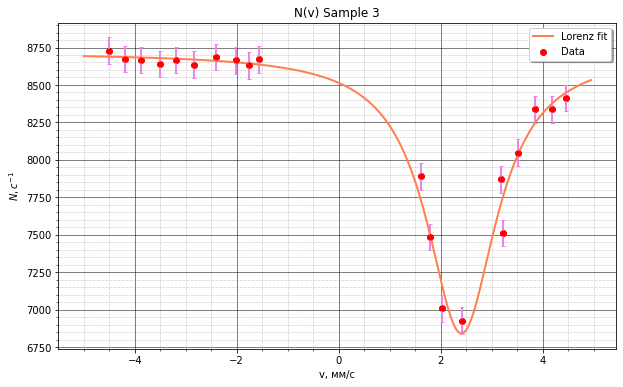

In [143]:
X = X3
Y = Y3

def approx(x, a, b,c,d):
    return b - abs(a)/(1 + (2*(x - d)/c)**2)
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)
#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)

residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_c/abs(d))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(-5,5, 0.05)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(X, Y, c = 'r')
lgnd = ax.legend(['Lorenz fit', 'Data'], loc='best', shadow=True)

ax.set_title(r'N(v) Sample 3')
ax.set_ylabel(r'$N, c^{-1}$')
ax.set_xlabel(r'v, мм/с')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(X, Y, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.savefig('pictures/S3fit.png', dpi=400, quality=100)
plt.show()

a =  -12250.2043659305
b =  32588.94419449195
c =  0.9214956051283226
d =  -0.021412157015212922
sigma_a =  164.33042656259911
sigma_b =  21.241478676235513
sigma_c =  0.013133165328145976
sigma_d =  0.0029489678784728112
S_e =  42.83886377253587
Relative S_r a = %  1.3414504905699745
Relative S_r b = %  0.06518001488316293
Relative S_r c = %  1.425201081270173
Relative S_r d = %  13.772399839855586


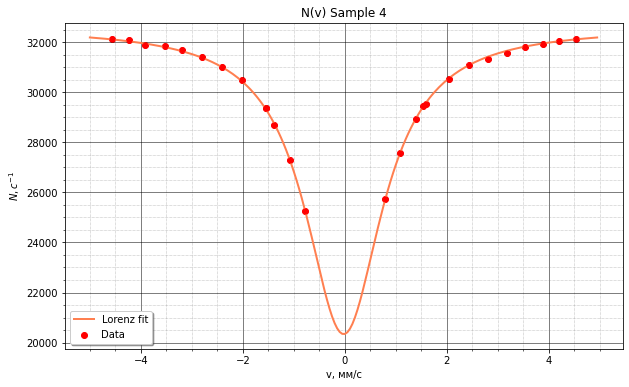

In [144]:
X = X4
Y = Y4

def approx(x, a, b,c,d):
    return b - abs(a)/(1 + ((x - d)/c)**2)
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)
#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])
sigma_d = np.sqrt(beta_cov1[3,3])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)
print('sigma_d = ', sigma_d)

residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))
print('Relative S_r d = % ', 100* sigma_d/abs(d))
# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(-5,5, 0.05)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(X, Y, c = 'r')
lgnd = ax.legend(['Lorenz fit', 'Data'], loc='best', shadow=True)

ax.set_title(r'N(v) Sample 4')
ax.set_ylabel(r'$N, c^{-1}$')
ax.set_xlabel(r'v, мм/с')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(X, Y, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')

plt.savefig('pictures/S4fit.png', dpi=400, quality=100)
plt.show()

In [27]:
10**(-30)/(23.8 / (3*10**8) * 0.04 )

3.1512605042016804e-22